In [1]:
import tensortools as tt
import numpy as np
import preprocessing as pp
import utilities as u
import scipy as sp

% matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
mice = ['4139190.1','4139190.3','4139212.2','4139219.2','4139219.3','4139224.2','4139224.3','4139224.5']
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

In [31]:
mouse = '4139219.2'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]

sess = df_mouse.iloc[10]


In [32]:
VRDat,C,Cd, S, A = pp.load_scan_sess(sess)
#C = sp.stats.zscore(C,axis=0)
#cmax = np.max(C,axis=0)
#print(cmax.shape)
#C= np.divide(C,np.dot(np.ones([C.shape[0],1]),cmax[np.newaxis,:]))
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,tstart_inds,teleport_inds)
C_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(C,VRDat.pos._values,tstart_inds,teleport_inds)



G:\My Drive\2P_Data\TwoTower\4139219.2\23_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_011.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcas

G:\My Drive\2P_Data\TwoTower\4139219.2\23_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_011.mat
#subsystem#not made into numpy array
Anot made into numpy array
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:250: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:251: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [36]:
import pickle
with open("G:\\My Drive\\2P_Data\\TwoTower\\4139219.2\\23_10_2018\\TwoTower_Timeout\\data.pkl",'wb') as f:
    pickle.dump({'C':C,'VRDat':VRDat,'C_trial_pos_N':C_trial_mat,'posbins':centers,'trial_info':trial_info},f)
    


In [20]:
print(C_trial_mat.shape)

(60, 90, 995)


In [35]:
print(trial_info.keys())

dict_keys(['morphs', 'max_pos', 'rewards', 'zone0_licks', 'zone1_licks', 'zone0_speed', 'zone1_speed', 'pcnt', 'wallJitter', 'towerJitter', 'bckgndJitter', 'clickOn', 'pos_lick'])


In [22]:
mdl=tt.Ensemble(fit_method='ncp_hals',nonneg=True)

In [23]:
mdl.fit(C_trial_mat[:,:,:].T, ranks=range(1, 40), replicates=5)

Rank-1 models:  min obj, 0.83;  max obj, 0.83;  time to fit, 3.4s


Rank-2 models:  min obj, 0.81;  max obj, 0.81;  time to fit, 25.7s


Rank-3 models:  min obj, 0.79;  max obj, 0.79;  time to fit, 34.9s


Rank-4 models:  min obj, 0.78;  max obj, 0.78;  time to fit, 31.5s


Rank-5 models:  min obj, 0.76;  max obj, 0.77;  time to fit, 35.7s


Rank-6 models:  min obj, 0.75;  max obj, 0.76;  time to fit, 48.3s


Rank-7 models:  min obj, 0.75;  max obj, 0.75;  time to fit, 38.7s


Rank-8 models:  min obj, 0.74;  max obj, 0.74;  time to fit, 48.1s


Rank-9 models:  min obj, 0.73;  max obj, 0.73;  time to fit, 40.1s


Rank-10 models:  min obj, 0.72;  max obj, 0.72;  time to fit, 46.9s


Rank-11 models:  min obj, 0.71;  max obj, 0.71;  time to fit, 51.8s


Rank-12 models:  min obj, 0.71;  max obj, 0.71;  time to fit, 39.8s


Rank-13 models:  min obj, 0.70;  max obj, 0.70;  time to fit, 44.4s


Rank-14 models:  min obj, 0.70;  max obj, 0.70;  time to fit, 53.4s


Rank-15 models:  min obj, 0.69;  max obj, 0.69;  time to fit, 55.9s


Rank-16 models:  min obj, 0.69;  max obj, 0.69;  time to fit, 43.6s


Rank-17 models:  min obj, 0.68;  max obj, 0.68;  time to fit, 59.5s


Rank-18 models:  min obj, 0.68;  max obj, 0.68;  time to fit, 65.0s


Rank-19 models:  min obj, 0.67;  max obj, 0.68;  time to fit, 51.6s


Rank-20 models:  min obj, 0.67;  max obj, 0.67;  time to fit, 78.8s


Rank-21 models:  min obj, 0.67;  max obj, 0.67;  time to fit, 66.9s


Rank-22 models:  min obj, 0.67;  max obj, 0.67;  time to fit, 80.8s


Rank-23 models:  min obj, 0.66;  max obj, 0.66;  time to fit, 93.9s


Rank-24 models:  min obj, 0.66;  max obj, 0.66;  time to fit, 69.7s


Rank-25 models:  min obj, 0.66;  max obj, 0.66;  time to fit, 81.2s


Rank-26 models:  min obj, 0.66;  max obj, 0.66;  time to fit, 77.6s


Rank-27 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 68.0s


Rank-28 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 66.1s


Rank-29 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 78.8s


Rank-30 models:  min obj, 0.65;  max obj, 0.65;  time to fit, 97.9s


Rank-31 models:  min obj, 0.64;  max obj, 0.65;  time to fit, 93.6s


Rank-32 models:  min obj, 0.64;  max obj, 0.64;  time to fit, 79.2s


Rank-33 models:  min obj, 0.64;  max obj, 0.64;  time to fit, 74.6s


Rank-34 models:  min obj, 0.64;  max obj, 0.64;  time to fit, 72.5s


Rank-35 models:  min obj, 0.64;  max obj, 0.64;  time to fit, 71.7s


Rank-36 models:  min obj, 0.63;  max obj, 0.64;  time to fit, 86.1s


Rank-37 models:  min obj, 0.63;  max obj, 0.63;  time to fit, 106.9s


Rank-38 models:  min obj, 0.63;  max obj, 0.63;  time to fit, 77.1s


Rank-39 models:  min obj, 0.63;  max obj, 0.63;  time to fit, 115.6s


(0, 40)

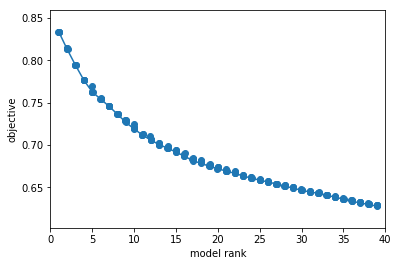

In [24]:
ax=tt.plot_objective(mdl)
ax.set_xlim([0,40])

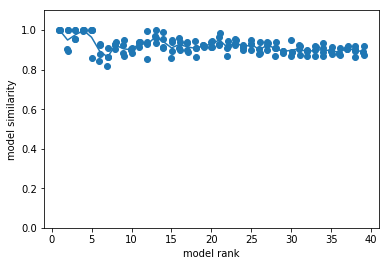

In [30]:
ax=tt.plot_similarity(mdl)
#ax.set_xlim([10,25])

In [27]:
best_mdl=12

In [28]:
# take rank 15 results, seems like parsimonious local minima
obj = mdl.objectives(best_mdl)
# get best model
mdl_hat = mdl.results[best_mdl][0]
# get factors from best model
U=mdl_hat.factors

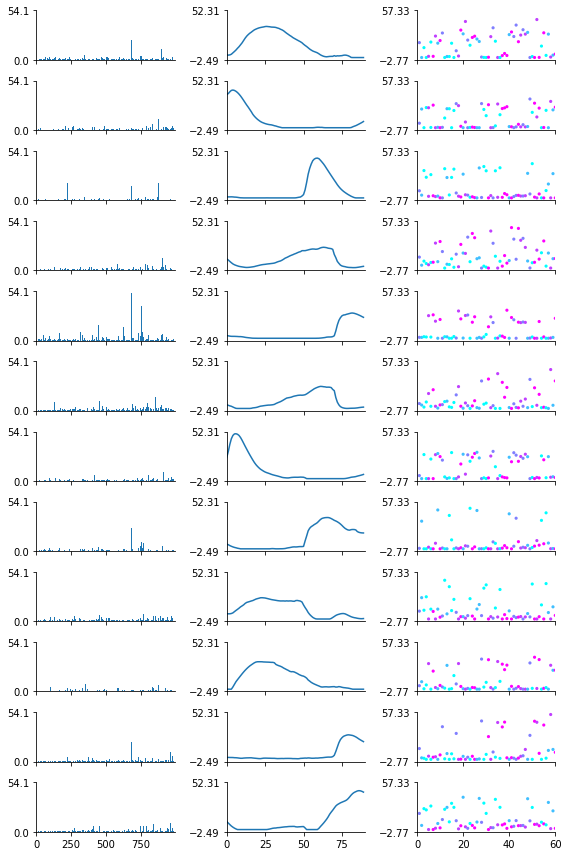

In [29]:
f,ax,plot_obj = tt.plot_factors(U,plots=['bar','line','scatter'],scatter_kw={'c':trial_info['morphs'],'cmap':'cool'})

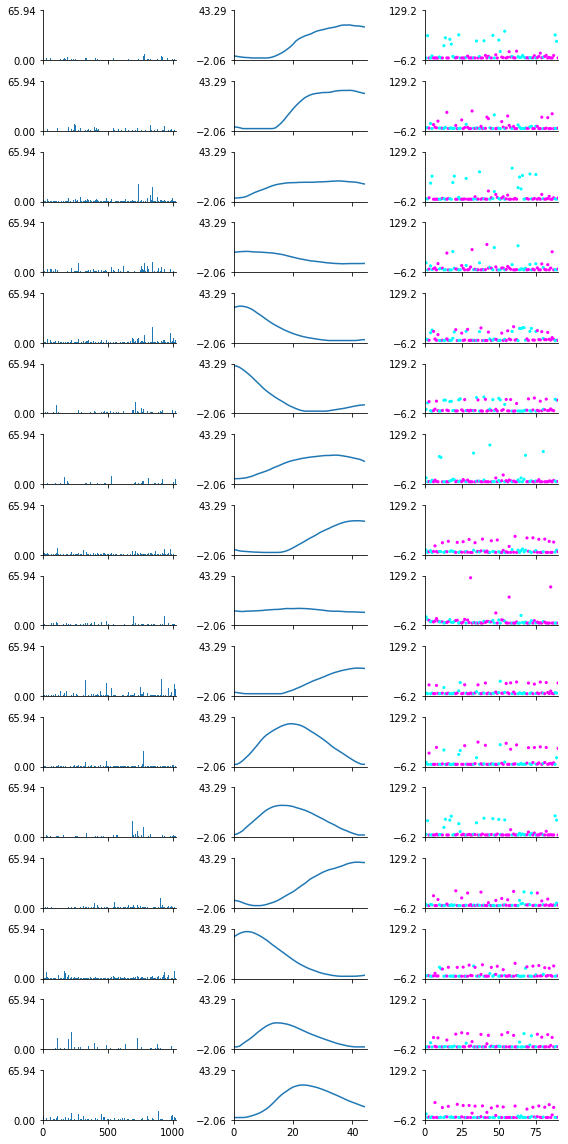

In [97]:
f,ax,plot_obj = tt.plot_factors(U,plots=['bar','line','scatter'],
                                scatter_kw={'c':trial_info['morphs']+trial_info['bckgndJitter']>.5,
                                            'cmap':'cool'}) #,
                                           #'s':-10*((trial_info['rewards']>0)-1)+3})

In [ ]:
print(trial_info.keys())